In [1]:
import numpy as np
from sennet.core.mmap_arrays import read_mmap_array

# read predictions
file_path = "/opt/kaggle/sennet/data_dumps/predicted/ensembled/kidney_3_dense/chunk_00/mean_prob/"
mmap_array = read_mmap_array(file_path)
print(f"{mmap_array.shape=}")

# read labels
label_path = "/opt/kaggle/sennet/data_dumps/processed/kidney_3_dense/label"
mmap_labels = read_mmap_array(label_path)
print(f"{mmap_labels.shape=}")

mmap_array.shape=[501, 1706, 1510]
mmap_labels.shape=[501, 1706, 1510]


In [2]:
mid_slice_indx = mmap_array.shape[0] // 2
mid_slice = np.array(mmap_array.data[mid_slice_indx])

mid_slice_labels = np.array(mmap_labels.data[mid_slice_indx])

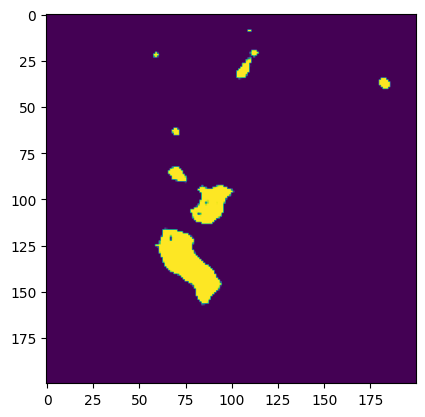

In [3]:
import matplotlib.pyplot as plt

plt.imshow(mid_slice[200:400, 600:800])

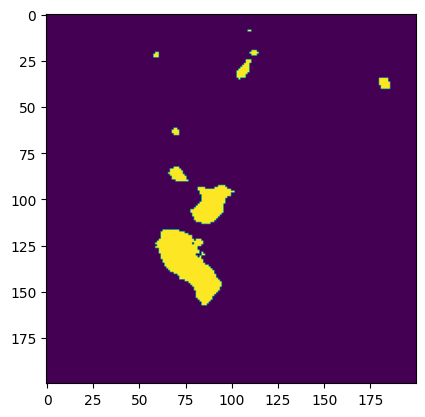

In [4]:
import matplotlib.pyplot as plt

plt.imshow(mid_slice_labels[200:400, 600:800])

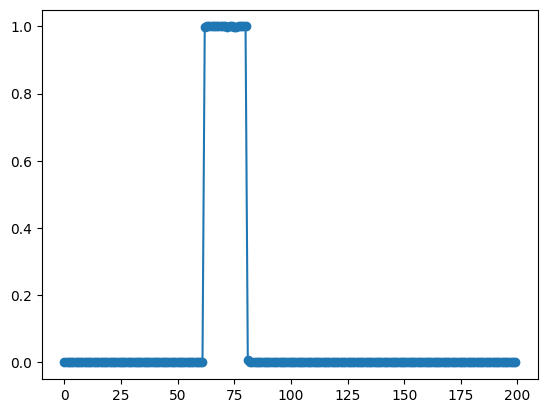

In [5]:
density_slice = mid_slice[200:400, 600:800][130, :]
plt.plot(density_slice, marker='o')

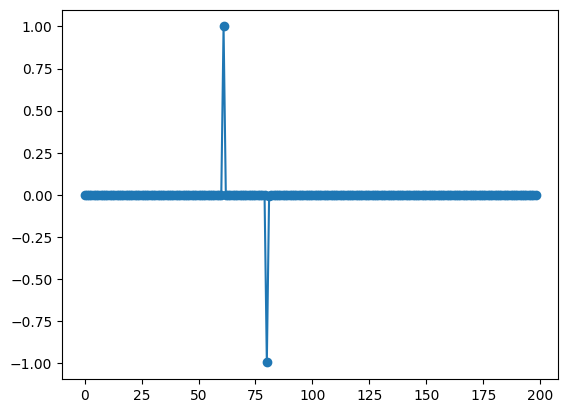

In [6]:
plt.plot(np.diff(density_slice), marker='o')

# harder example

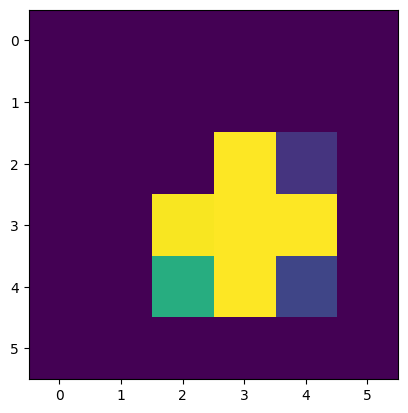

In [7]:
import matplotlib.pyplot as plt

plt.imshow(mid_slice[200:400, 600:800][15:30, 50:70][4:10, 6:12])

In [8]:
mid_slice[200:400, 600:800][15:30, 50:70][4:10, 6:12][2]

array([0.        , 0.        , 0.        , 0.99804687, 0.1517334 ,
       0.        ])

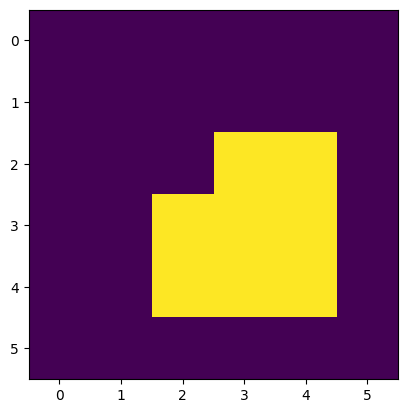

In [9]:
import matplotlib.pyplot as plt

plt.imshow(mid_slice_labels[200:400, 600:800][15:30, 50:70][4:10, 6:12])

# histogram

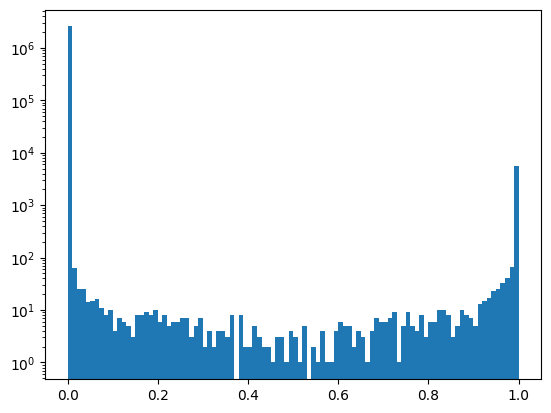

In [11]:
x = mid_slice.flatten()
plt.hist(x, bins=100, range=(0, 1));

plt.yscale('log')

# plt.ylim(0, 20)

In [12]:
print(np.sum(x>0.005) / x.shape[0])
print(np.sum(x>0.9) / x.shape[0])
print(np.sum(x>0.0005) / x.shape[0])

0.0024929543566531835
0.0022511121635365636
0.002578744283906431


# 3D visualization

In [13]:
x = mmap_array.data
x_img = np.sum(mmap_array.data, axis=0)

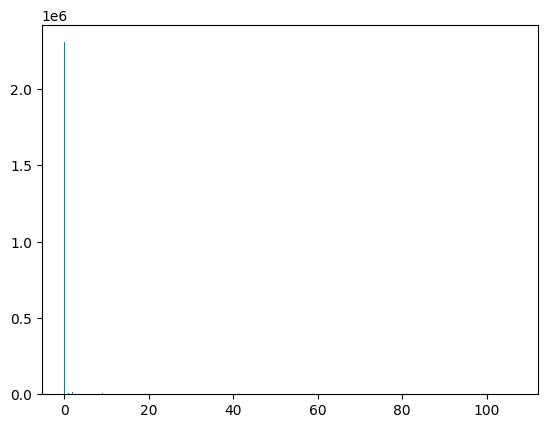

In [14]:
plt.hist(x_img.flatten(), bins=1000);

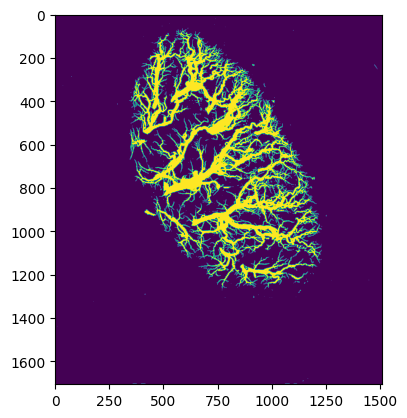

In [15]:


x_img_th = np.array(x_img > 0.002, dtype=np.uint8)
plt.imshow(x_img_th)

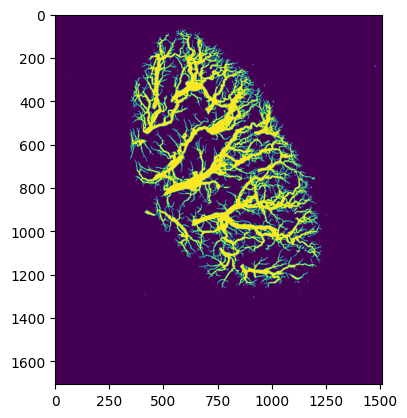

In [16]:


x_img_th = np.array(x_img > 0.02, dtype=np.uint8)
plt.imshow(x_img_th)

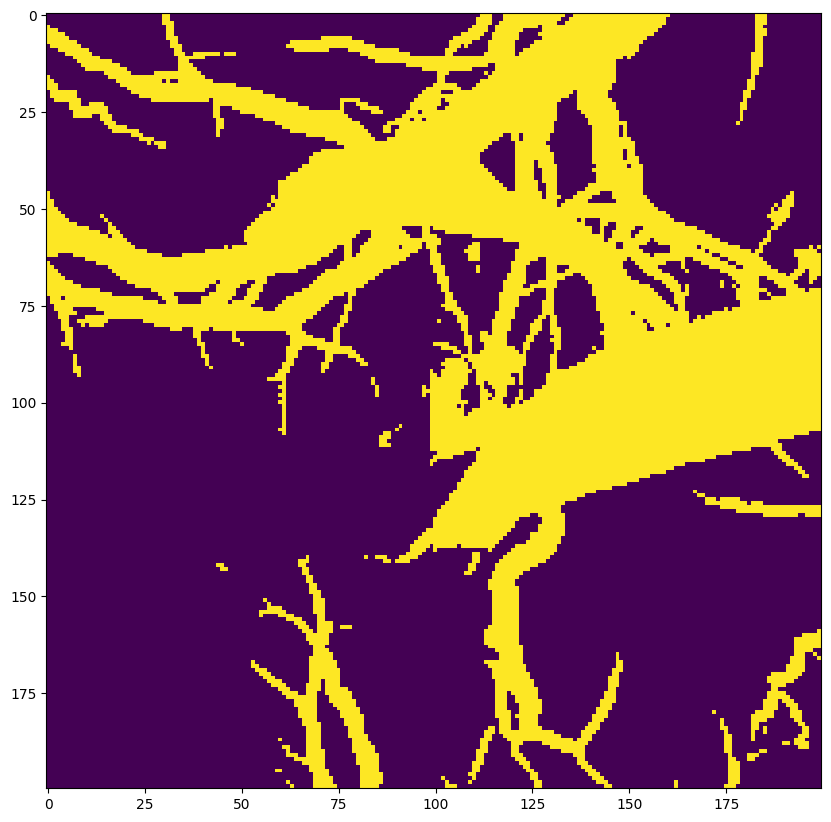

In [17]:
plt.figure(figsize=(10, 20))

plt.imshow(x_img_th[700:900, 400:600])

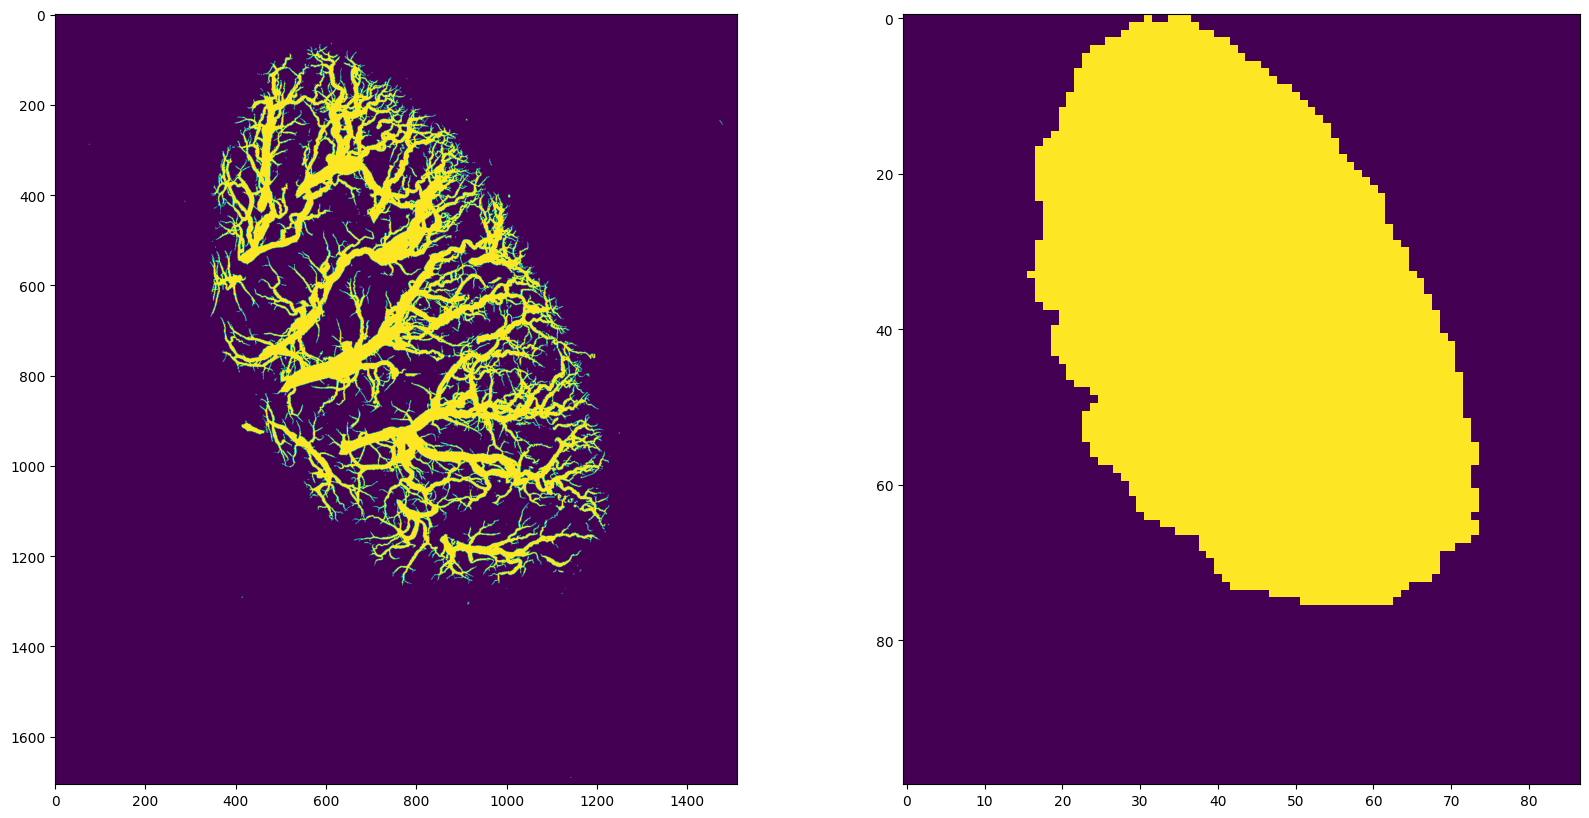

In [18]:
# apply max over 32x32 kernel, using pytorch
import torch
import torch.nn.functional as F

x_img_th_torch = torch.from_numpy(x_img_th).unsqueeze(0).unsqueeze(0).float()
# apply max over 32x32 kernel, using pytorch
x_img_th_avg = F.avg_pool2d(x_img_th_torch, kernel_size=128, stride=16)
x_img_th_avg = x_img_th_avg.squeeze().numpy() > 0.1


# two figures
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

ax1.imshow(x_img_th)

ax2.imshow(x_img_th_avg)

In [19]:
x = mmap_labels.data
x_labels = np.sum(mmap_labels.data, axis=0)

In [20]:
plt.figure(figsize=(10, 10))

plt.imshow(x_labels_th[700:900, 400:600])

NameError: name 'x_labels_th' is not defined

<Figure size 1000x1000 with 0 Axes>

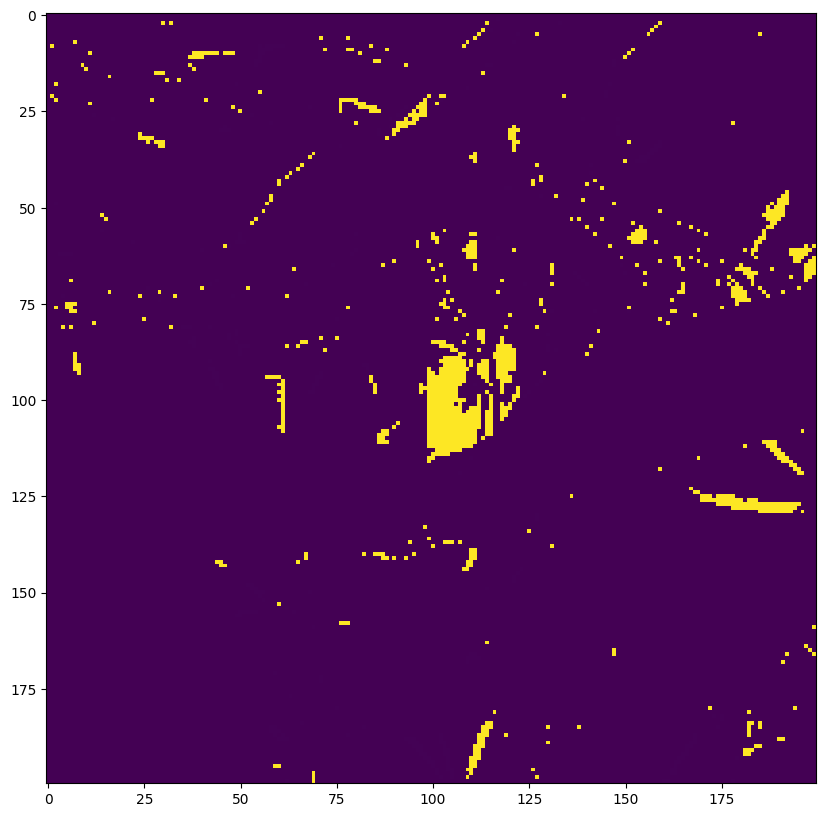

In [21]:
plt.figure(figsize=(10, 10))

x_labels_th = np.array(x_labels > 0.02, dtype=np.uint8)

diff = x_labels_th - x_img_th
plt.imshow(diff[700:900, 400:600])

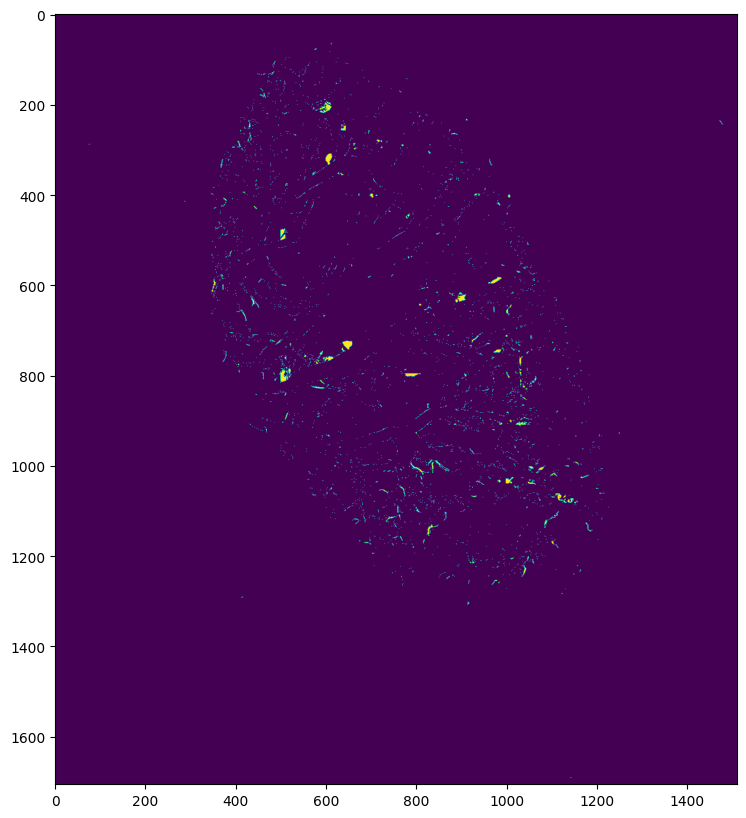

In [22]:
plt.figure(figsize=(10, 10))

plt.imshow(diff)

(B, D=depth, C=1, H, W) -> pass to the Unet to make D passes of the 2D Unet model -> ((B, D, C, H, W))
-> add couple of 3D convs to communicate across the channels -> ((B, D, C, H, W))

# Explore predictions around the surface

In [48]:
import numpy as np
from sennet.core.mmap_arrays import read_mmap_array

# read predictions
file_path = "/opt/kaggle/sennet/data_dumps/predicted/ensembled/kidney_3_dense/chunk_00/mean_prob/"
mmap_array = read_mmap_array(file_path)
print(f"{mmap_array.shape=}")

# read labels
label_path = "/opt/kaggle/sennet/data_dumps/processed/kidney_3_dense/label"
mmap_labels = read_mmap_array(label_path)
print(f"{mmap_labels.shape=}")

mmap_array.shape=[501, 1706, 1510]
mmap_labels.shape=[501, 1706, 1510]


In [49]:
labels = np.array(mmap_labels.data)
predictions = (np.array(mmap_array.data > 0.2)).astype(np.uint8)

In [50]:
# calculate true positives, false positives, false negatives
true_positives = np.sum(labels * predictions)
false_positives = np.sum((1 - labels) * predictions)
false_negatives = np.sum(labels * (1 - predictions))

print(f"{true_positives=}")
print(f"{false_positives=}")
print(f"{false_negatives=}")

true_positives=2665634
false_positives=83806
false_negatives=240131


In [51]:
def print_scores(th):

	labels = np.array(mmap_labels.data)
	predictions = (np.array(mmap_array.data > th)).astype(np.uint8)

	# calculate true positives, false positives, false negatives
	true_positives = np.sum(labels * predictions)
	false_positives = np.sum((1 - labels) * predictions)
	false_negatives = np.sum(labels * (1 - predictions))

	print(f"{th=}")
	print(f"{true_positives=}")
	print(f"{false_positives=}")
	print(f"{false_negatives=}")
	print(f"------------------")
 
print_scores(0.003)
print_scores(0.1)
print_scores(0.2)
print_scores(0.3)
print_scores(0.4)
print_scores(0.5)
print_scores(0.6)
print_scores(0.7)
print_scores(0.8)

th=0.003
true_positives=2768318
false_positives=194239
false_negatives=137447
------------------
th=0.1
true_positives=2689420
false_positives=103366
false_negatives=216345
------------------
th=0.2
true_positives=2665634
false_positives=83806
false_negatives=240131
------------------
th=0.3
true_positives=2646872
false_positives=72831
false_negatives=258893
------------------
th=0.4
true_positives=2627656
false_positives=62801
false_negatives=278109
------------------
th=0.5
true_positives=2586285
false_positives=48330
false_negatives=319480
------------------
th=0.6
true_positives=2550933
false_positives=39953
false_negatives=354832
------------------
th=0.7
true_positives=2525186
false_positives=35109
false_negatives=380579
------------------
th=0.8
true_positives=2498111
false_positives=30639
false_negatives=407654
------------------


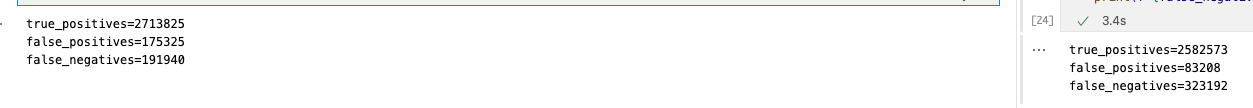

In [37]:
mid_slice_indx = mmap_array.shape[0] // 2 - 10
mid_slice = np.array(mmap_array.data[mid_slice_indx:mid_slice_indx+20])

mid_slice_labels = np.array(mmap_labels.data[mid_slice_indx:mid_slice_indx+20])

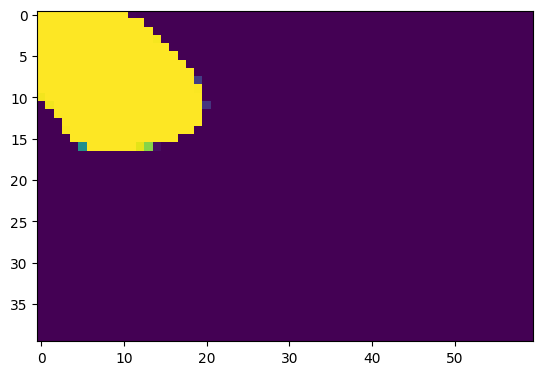

In [38]:
import matplotlib.pyplot as plt

plt.imshow(mid_slice[0, :][200:400, 600:800][120:160, 60:120])

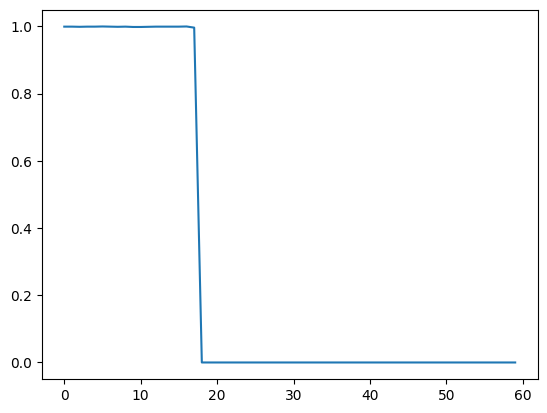

In [39]:
plt.plot(mid_slice[0, :][200:400, 600:800][120:160, 60:120][6, :])

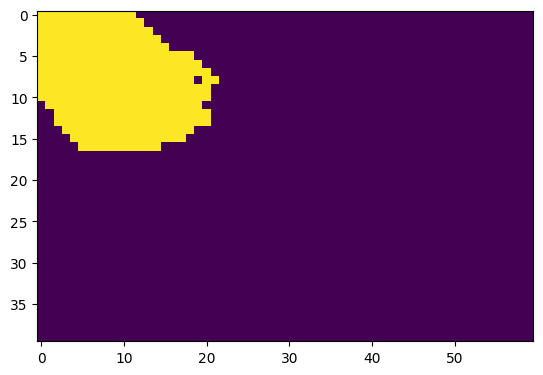

In [40]:
import matplotlib.pyplot as plt

plt.imshow(mid_slice_labels[0, :][200:400, 600:800][120:160, 60:120])

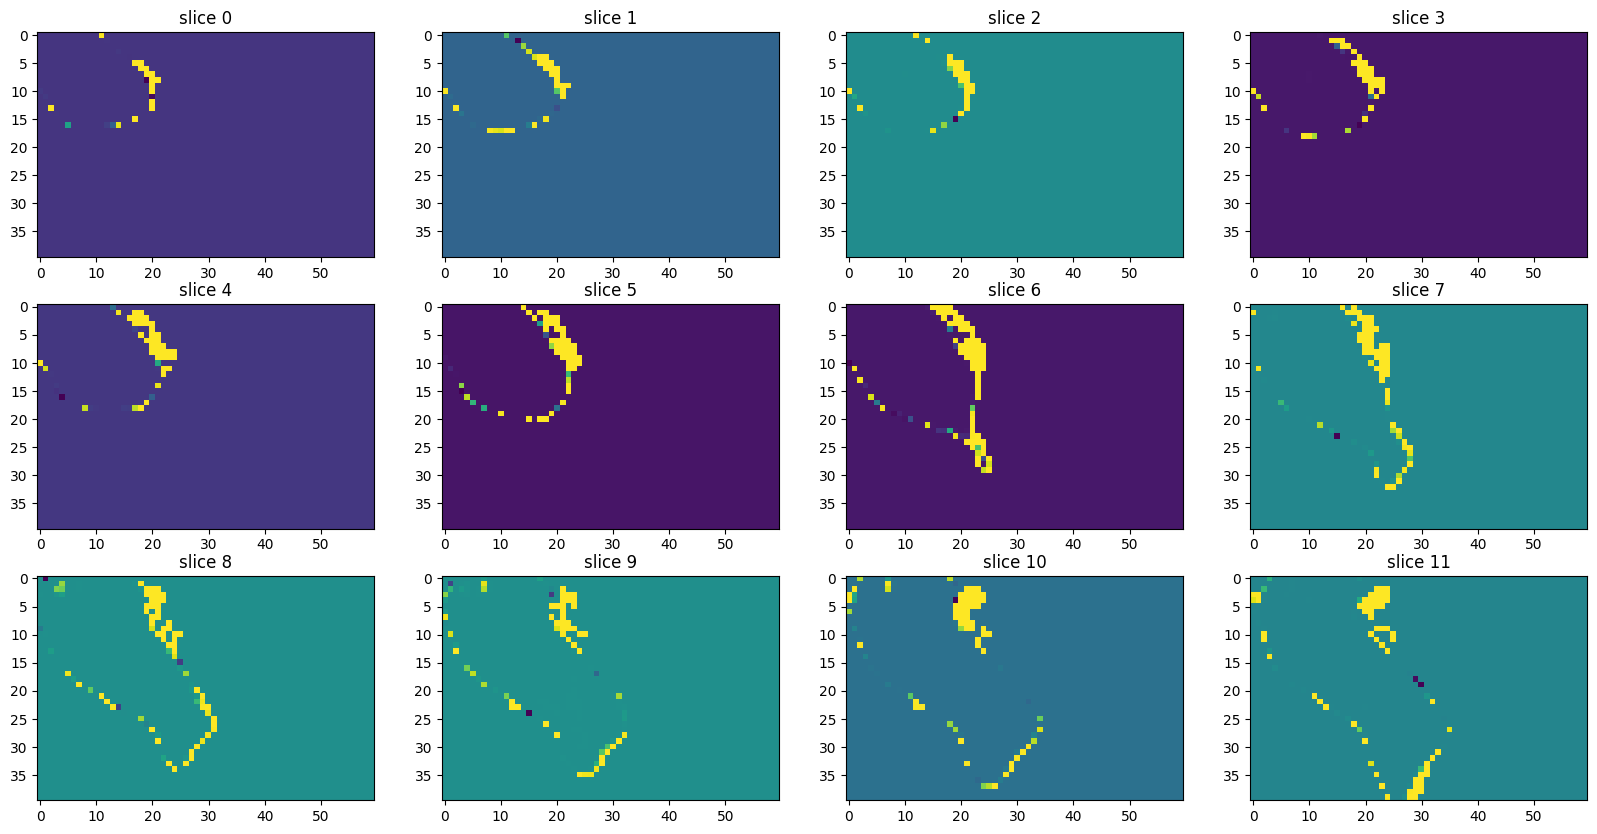

In [41]:
diff = mid_slice_labels[:, 200:400, 600:800][:, 120:160, 60:120] - mid_slice[:, 200:400, 600:800][:, 120:160, 60:120]

fig, axs = plt.subplots(3, 4, figsize=(20, 10))

for i in range(3):
	for j in range(4):
		axs[i, j].imshow(diff[i*4+j])
		axs[i, j].set_title(f"slice {i*4+j}")

In [42]:
true_positives = labels * predictions
false_positives = (1 - labels) * predictions
false_negatives = labels * (1 - predictions)

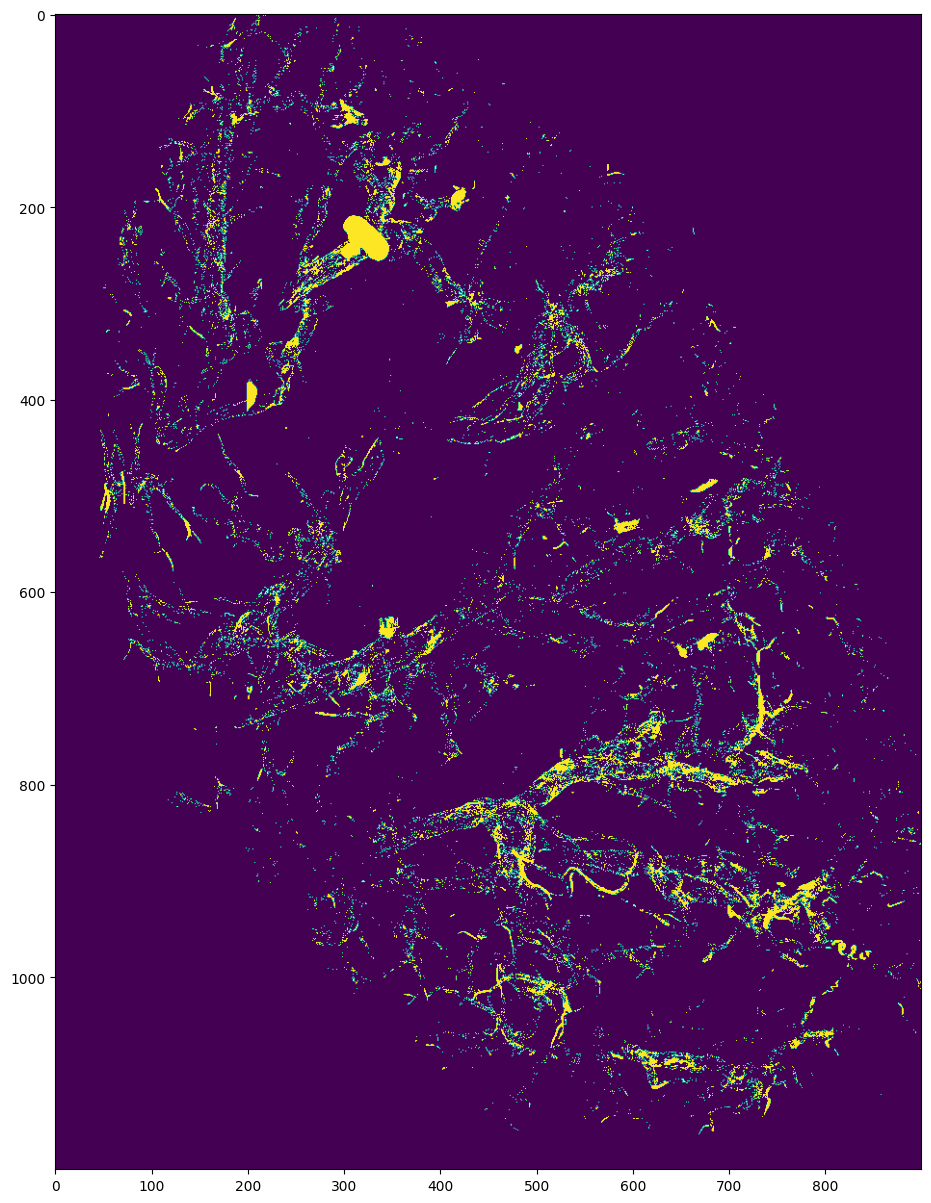

In [43]:
# set figure size
plt.figure(figsize=(15, 15))

plt.imshow(np.max(false_positives, axis=0)[100:1300, 300:1200])

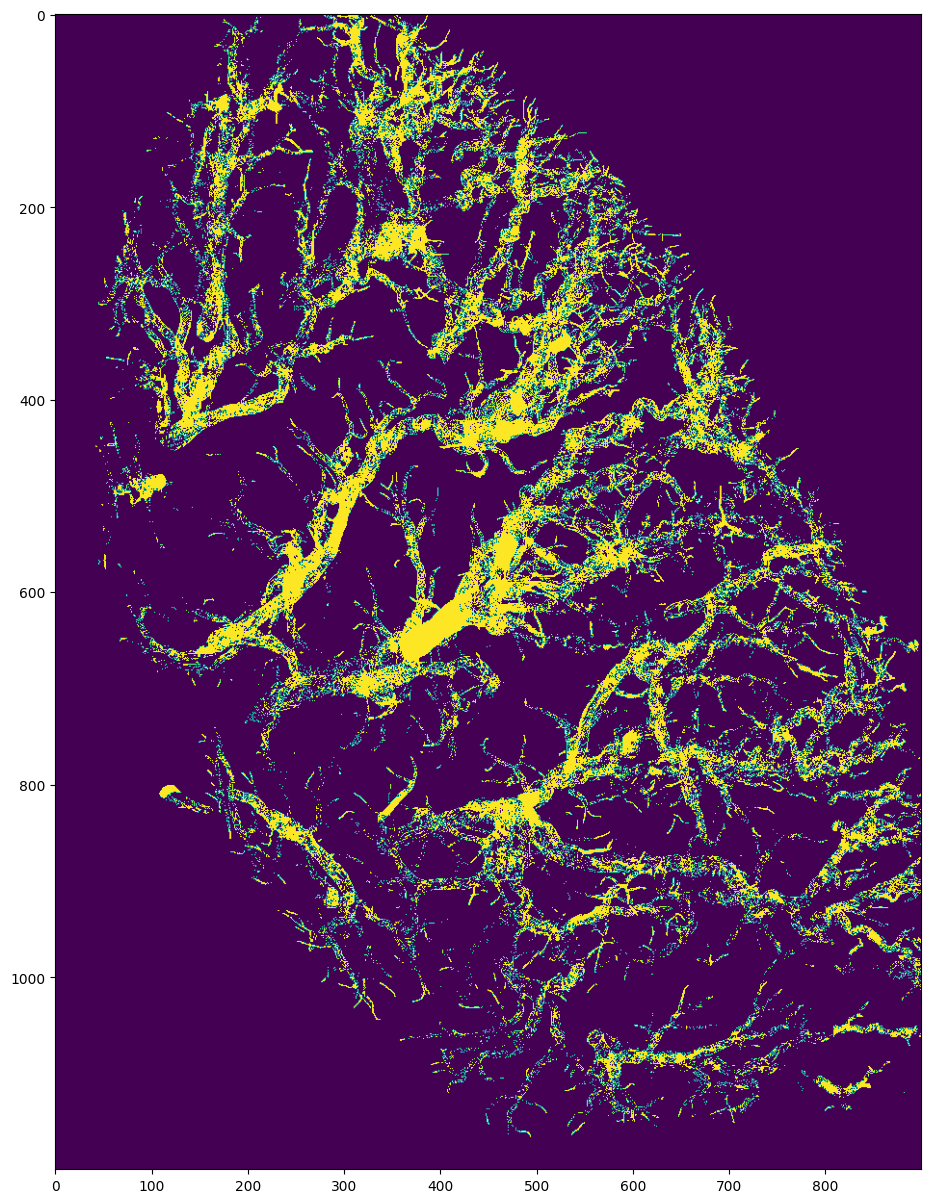

In [44]:
# set figure size
plt.figure(figsize=(15, 15))

plt.imshow(np.max(false_negatives, axis=0)[100:1300, 300:1200])

# investigate false negatives

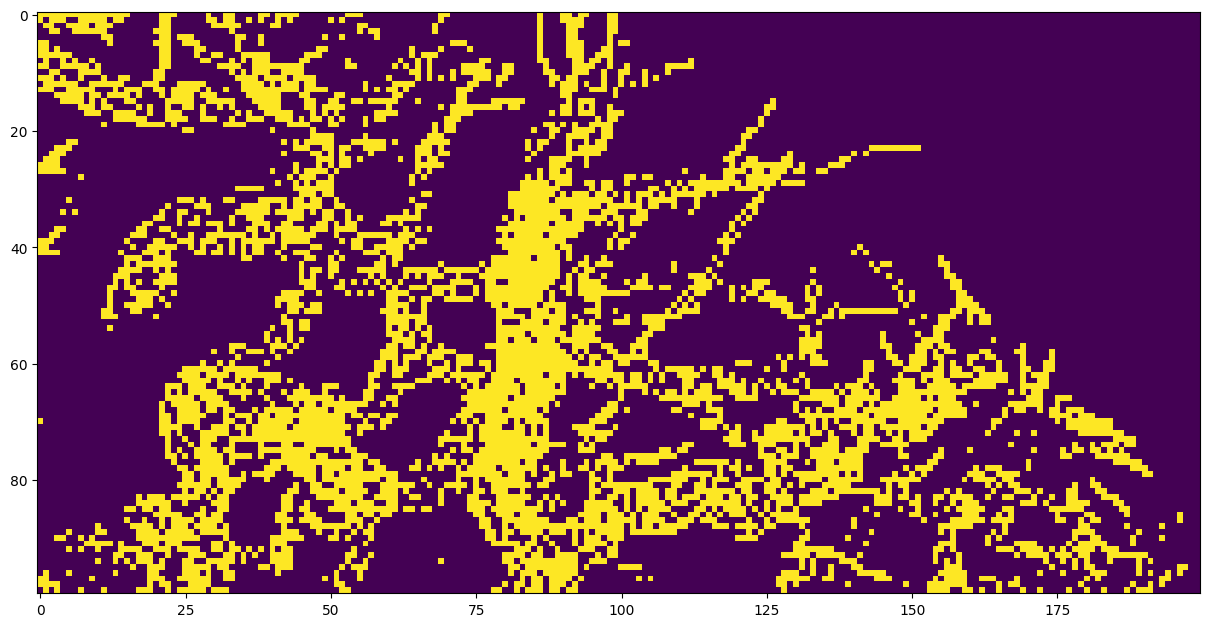

In [45]:
# set figure size
plt.figure(figsize=(15, 15))

plt.imshow(np.max(false_negatives, axis=0)[100:1300, 300:1200][100:200, 400:600])